# Visualizing the late 1990's steroid abuse in Baseball 
#### "The Cream" (Testosterone-Epitestosterone Cream)ects & "The Clear" (THG, Tetrahydrogestrinone, Norbolethone)

Adriana Moscatelli - June, 2017

### Introduction

The following data analysis report presents a visualization of data relating to the steroid abuse practice in baseball. As it was highlighted in the Mitchell report, steroid and any other substance abuse poses health risks to the players, it gives an unfair advantage to those who consume the substances compared to those who don't, it does not adhere to the fair rules of the game and it provides a negative role model for young athletes who see the abuse of substances as an accepted practice they should adhere to even though it is illegal and it poses severe health risks.

<i>"The Major League Baseball’s Joint Drug Prevention and Treatment Program was added to the Basic
Agreement in 2002. Under that program, testing has been conducted of players in Major League Baseball since 2003, first in the form of <u>anonymous survey testing in 2003</u>, and thereafter in <u>mandatory random testing,</u> that now carries with it severe penalties for violations. The program has been amended formally twice since 2002 as the result of negotiations between the Commissioner and the Players Association, and other minor modifications also have been made. As a result, penalties have been increased, the list of prohibited substances has been lengthened, and some improvements in procedures have been made."

"Adoption of the current program was a positive first step. The information obtained in this investigation suggests that the use of detectable steroids by players in Major League Baseball has declined but the use of human growth hormone has increased. In some respects, however, the program still falls short of current best practices in drug testing for the use of performance enhancing substances."</i>

Source: The Mitchell report, December 13, 2007 (http://files.mlb.com/mitchrpt.pdf)

### Key Dates

1994: Commissioner Selig and the club owners proposed a drug program that would have included some forms of testing and would have listed steroids among baseball’s prohibited substances. The Players Association did not agree to the proposal.

2001: The Commissioner had unilaterally implemented drug testing throughout baseball’s affiliated minor leagues.

2002: Commissioner's proposal to the Players Association for a major league drug testing program. The program provided for the possibility of mandatory random drug testing of all major league players if more than 5% of players tested positive for steroids during anonymous survey testing in 2003.

2004: Mandatory random drug testing began in Major League Baseball after that did in fact occur after more than 5% of players tested positive for steroids during anonymous survey testing in 2003. That year, there were 12 undisputed positive tests for steroids.

2005: Human growth hormone (along with seventeen other compounds) was added to the list of prohibited substances. 
The Players Association agreed to more stringent penalties for a positive test for steroids (or similar substances) including, for the first time, a suspension of ten days for a player’s first positive test. In 2005, 12 players tested positive for steroids and were suspended for ten days.
Later that year, further revisions were agreed to, including significant increases in penalties: a 50-game suspension for a first positive test; a 100-game suspension for a second positive test; and a permanent suspension for a third positive test.

2006: Two players tested positive for steroids and were suspended for 50 games.

2007: Three players were suspended for 50 games each for positive steroids tests.

Source: The Mitchell report (http://files.mlb.com/summary.pdf)

### Key figures

<img src= "http://d3k2oh6evki4b7.cloudfront.net/req/201706013/images/headshots/3/37e0251c_mlbam.jpg" align="left" style="margin:0px 10px 0px 0px" width="100">
<b>Jose Canseco</b> of the Oakland Athletics was the subject of the first media speculation about his use of steroids, and Boston Red Sox fans taunted him for his alleged steroids use during the 1988 American League Championship Series.

<img src= "http://d3k2oh6evki4b7.cloudfront.net/req/201706013/images/headshots/0/0d30f993_davis.jpg" align="left" align="left" style="margin:0px 10px 0px 0px" width="100">
<b>Ken Caminiti</b> of the San Diego Padres was voted the National League’s Most Valuable Player in 1996, after a dramatic increase in offense throughout Major League Baseball. In a 2002 Sports Illustrated article, he admitted that he had been using steroids that season and credited them for his increased power.

<img src= "http://d3k2oh6evki4b7.cloudfront.net/req/201706013/images/headshots/1/1d5cdccc_davis.jpg" align="left" align="left" style="margin:0px 10px 0px 0px" width="100">
<b>Mark McGwire</b> gained attention in August 1998 when an article reported that he was using the then illegal steroid precursor androstenedione while chasing the single-season home run record.

From 2000 to 2002 players from several teams were caught in possession of bottles of steroids, syringes, diet pills and other drugs.

Source: The Mitchell report (http://files.mlb.com/summary.pdf)

### Objectives

The data visualization below starts by looking at overall trends in Home Runs over the entire history of baseball. For the 3 players who were at the center of the scandal (Canseco, Caminiti and McGwire), we look at career statistics, focusing on number of home runs, hits, doubles and triples. We compare player statistics to other top players who were also active during the 90s and have also been reported to use Performance Enhancing Substances PES (per the Mitchell report). We also examine statistics of players in the 60s and players since 2008 (which is well after the enforced testing rules of 2004).
Our goal is to see if there are any patterns or trends that are useful in identifing players who consume Performance Enhancing Substances. Can we identify trends/patterns in PES users' performance? Are these trends/patters different from players who don't use PES? One of the challenges in looking at this data is that we don't really know who consumed PES and who didn't. We also can't be sure that players in the 60s were not consuming PES. In 1958, the FDA approves the first anabolic steroid for sale in the US <sup>3</sup>. 

In [2794]:
# Setting up the environment.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# The tables have many columns so we need to set the options to be able to see them all.
pd.options.display.max_columns = 48
# Various libraries needed for the matplotlib charts
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
# Statistics packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [2499]:
# These are the tables we care about from the Lahman’s Baseball Database.
master_df = pd.read_csv('Master.csv')
teams_df = pd.read_csv('Teams.csv')
batting_df = pd.read_csv('Batting.csv')
# This is a table with the names and last names of players who have been linked to the use of
# performance enhancing subtances (PES). Names obtained from the Mitchell report.
# New players have been reported since then but we haven't included them in the pes table.
pes_df = pd.read_csv('MR_linked_PES.csv')

In [1772]:
master_df.head(3)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01


In [1666]:
pes_df.head(3)

,nameFirst,nameLast
0,Marvin,Benard
1,Barry,Bonds
2,Bobby,Estalella


In [2493]:
# Taking a look at the most HR in history. Barry Bonds is first with 73. McGwire comes second with 70.
# Both are in the Mitchell report since they used PES.
# Sammy Sosa is third with 66. Unfortunately he was reported to use steroids as well later:
# http://www.espn.com/mlb/columns/story?columnist=bryant_howard&id=4264973
sorted_batting_df = batting_df.sort_values(['HR'], ascending=False)
sorted_batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
80752,bondsba01,2001,1,SFN,NL,153,476,129,156,32,2,73,137.0,13.0,3.0,177,93.0,35.0,9.0,0.0,2.0,5.0
77389,mcgwima01,1998,1,SLN,NL,155,509,130,152,21,0,70,147.0,1.0,0.0,162,155.0,28.0,6.0,0.0,4.0,8.0
77736,sosasa01,1998,1,CHN,NL,159,643,134,198,20,0,66,158.0,18.0,9.0,73,171.0,14.0,1.0,0.0,5.0,20.0
78705,mcgwima01,1999,1,SLN,NL,153,521,118,145,21,1,65,147.0,0.0,0.0,133,141.0,21.0,2.0,0.0,5.0,12.0
81770,sosasa01,2001,1,CHN,NL,160,577,146,189,34,5,64,160.0,0.0,2.0,116,153.0,37.0,6.0,0.0,12.0,6.0


In [2572]:
# Groupping by yearID and playerID.
# Some players switch teams so we need to add up the stats for those players in one year.
# For all players.
bat_yp = batting_df.groupby(['yearID','playerID'], as_index = False).sum()

# Yearly stats (sum, avg, median, max, min)
bat_y = bat_yp.groupby(['yearID'], as_index=False).sum()
bat_y_avg = bat_yp.groupby(['yearID'], as_index=False).mean()
bat_y_med = bat_yp.groupby(['yearID'], as_index=False).median()
bat_y_max = bat_yp.groupby(['yearID'], as_index=False).max()
bat_y_min = bat_yp.groupby(['yearID'], as_index=False).min()

bat_y_avg.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1871,1.000000,19.965217,94.104348,23.121739,26.965217,3.773913,2.078261,0.408696,15.504348,3.834783,1.069565,3.417391,1.521739,NaN,NaN,NaN,NaN,NaN
1,1872,1.181818,23.125874,109.643357,23.706294,31.377622,3.965035,0.972028,0.244755,14.706294,1.776224,0.825175,1.727273,1.762238,NaN,NaN,NaN,NaN,NaN
2,1873,1.049180,29.532787,139.131148,29.344262,40.352459,4.557377,1.704918,0.377049,19.172131,1.434426,0.811475,2.639344,1.991803,NaN,NaN,NaN,NaN,NaN
3,1874,1.050000,34.991667,159.200000,28.916667,43.550000,5.275000,1.616667,0.333333,18.741667,1.883333,0.758333,1.966667,2.875000,NaN,NaN,NaN,NaN,NaN
4,1875,1.300000,32.889474,141.226316,22.284211,35.852632,4.415789,1.436842,0.210526,14.263158,3.310526,1.684211,1.310526,3.552632,NaN,NaN,NaN,NaN,NaN


In [2573]:
# Getting the start year and final game for each player. Also name and lastname.
debut = master_df[['playerID', 'debut','finalGame', 'nameFirst', 'nameLast']].copy()

#Max for all players (by year and player)
all_max = bat_yp.groupby('playerID', as_index=False)['H', 'HR', '2B', '3B'].max()
all_max_sort = all_max.sort_values(['HR'], ascending=False)

# Adding the first and final games for each player, name and last name.
all_max_year = pd.merge(all_max_sort, debut, on=['playerID'], how='inner')
all_max = all_max_year.sort_values(['HR'], ascending=False)
all_max.columns = ['playerID', 'Hmax', 'HRmax','2Bmax','3Bmax','debut', 
                   'finalGame', 'nameFirst', 'nameLast']

all_max.head(5)

,playerID,Hmax,HRmax,2Bmax,3Bmax,debut,finalGame,nameFirst,nameLast
0,bondsba01,181,73,44,9,1986-05-30,2007-09-26,Barry,Bonds
1,mcgwima01,161,70,28,4,1986-08-22,2001-10-07,Mark,McGwire
2,sosasa01,198,66,38,10,1989-06-16,2007-09-29,Sammy,Sosa
3,marisro01,159,61,34,7,1957-04-16,1968-09-29,Roger,Maris
4,ruthba01,205,60,45,16,1914-07-11,1935-05-30,Babe,Ruth


In [2574]:
# Seeing how many players have a high HR max. 
HRmax_counts = all_max.HRmax.value_counts().reset_index()
HRmax_counts.columns = ['HRmax', 'count']
print(HRmax_counts.head())
print(HRmax_counts.tail(10))

# Filtering for players 40 or more HR max
over_40 = HRmax_counts[HRmax_counts['HRmax'] > 39]
over_40['count'].sum()
over40_ratio = over_40['count'].sum()/len(all_max)
print ("%.2f" % over40_ratio)

   HRmax  count
0      0  11179
1      1   1968
2      2   1022
3      3    699
4      4    474
    HRmax  count
53     51      3
54     52      3
55     57      2
56     56      2
57     53      1
58     73      1
59     66      1
60     61      1
61     70      1
62     60      1
0.01


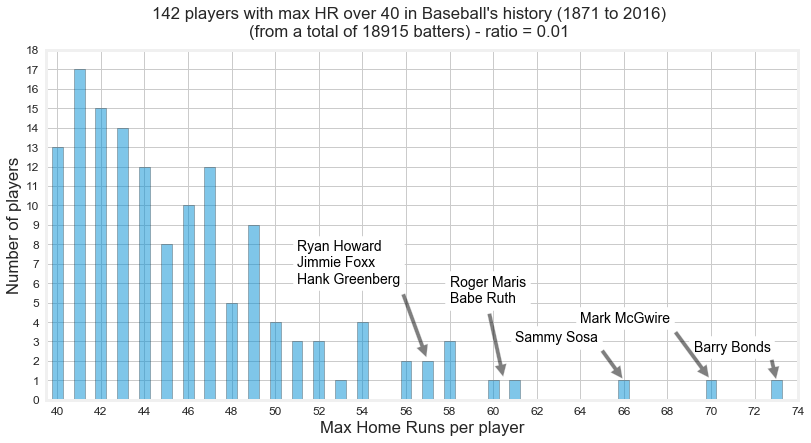

In [2575]:
# Plotting HR max over 40
fig = plt.figure(figsize=(12,6), facecolor='w')
fig.suptitle(str(over_40['count'].sum()) 
             +" players with max HR over 40 in Baseball's history (1871 to 2016)\n" 
             +'(from a total of '+str(len(all_max)) +' batters) - '
             + 'ratio =' +" %.2f" % over40_ratio)
ax = fig.add_subplot(1,1,1,facecolor='w')

ax.bar(HRmax_counts['HRmax'], HRmax_counts['count'], 0.5, align='center', alpha=0.5, edgecolor='k')


ax.annotate(str(all_max['nameFirst'].loc[0] +' ' +str(all_max['nameLast'].loc[0])), 
            xy=(73, 1), xytext=(69.2, 2.5), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))


ax.annotate(str(all_max['nameFirst'].loc[1] +' ' +str(all_max['nameLast'].loc[1])), 
            xy=(70, 1), xytext=(64, 4), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

ax.annotate(str(all_max['nameFirst'].loc[2] +' ' +str(all_max['nameLast'].loc[2])), 
            xy=(66, 1), xytext=(61, 3), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

ax.annotate(str(all_max['nameFirst'].loc[3] +' ' +str(all_max['nameLast'].loc[3]))
               +'\n'
               +(all_max['nameFirst'].loc[4] +' ' +str(all_max['nameLast'].loc[4])), 
            xy=(60.5, 1), xytext=(58, 5), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

ax.annotate(str(all_max['nameFirst'].loc[5] +' ' +str(all_max['nameLast'].loc[5]))
               +'\n'
               +(all_max['nameFirst'].loc[6] +' ' +str(all_max['nameLast'].loc[6]))
               +'\n'
               +(all_max['nameFirst'].loc[7] +' ' +str(all_max['nameLast'].loc[7])), 
            xy=(57, 2), xytext=(51, 6), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

plt.ylim(0, 18)
plt.xlim(39.5,74)
ax.locator_params(nbins=30)

ax.set_xlabel('Max Home Runs per player')
ax.set_ylabel('Number of players')

plt.show()

In [2576]:
# Seeing how many players have a high HR median. Not that many either... 
HRmedian_counts = all_med.HRmedian.value_counts().reset_index()
HRmedian_counts.columns = ['HRmedian', 'count']
print(HRmedian_counts.head())
print(HRmedian_counts.tail(10))

# Filtering for players over 15 HR median
over_15 = HRmedian_counts[HRmedian_counts['HRmedian'] > 14]
over_15['count'].sum()
over15_ratio = over_15['count'].sum()/len(all_med)
print ("%.2f" % over15_ratio)

   HRmedian  count
0       0.0  13482
1       1.0   1294
2       2.0    661
3       0.5    580
4       3.0    412
    HRmedian  count
64      35.5      2
65      33.0      2
66      35.0      2
67      38.0      2
68      37.0      1
69      30.5      1
70      33.5      1
71      32.5      1
72      36.0      1
73      38.5      1
0.02


In [2577]:
# Median for all players (by year and player)
all_median = bat_yp.groupby('playerID', as_index=False)['H', 'HR', '2B', '3B'].median()
all_med_sort = all_median.sort_values(['HR'], ascending=False).round(2)

# Adding the first and final games for each player, name and last name.
all_med_year = pd.merge(all_med_sort, debut, on=['playerID'], how='inner')
all_med = all_med_year.sort_values(['HR'], ascending=False)
all_med.columns = ['playerID', 'Hmedian', 'HRmedian','2Bmedian','3Bmedian','debut', 
                   'finalGame', 'nameFirst', 'nameLast']
all_med.head(5)

,playerID,Hmedian,HRmedian,2Bmedian,3Bmedian,debut,finalGame,nameFirst,nameLast
0,kinerra01,153.0,38.5,19.5,4.5,1946-04-16,1955-09-25,Ralph,Kiner
2,dunnad01,126.5,38.0,23.5,0.0,2001-07-20,2014-09-28,Adam,Dunn
1,ruthba01,147.5,38.0,26.0,5.5,1914-07-11,1935-05-30,Babe,Ruth
3,pujolal01,184.0,37.0,38.5,1.0,2001-04-02,2016-09-26,Albert,Pujols
4,mcgwima01,118.0,36.0,19.0,0.0,1986-08-22,2001-10-07,Mark,McGwire


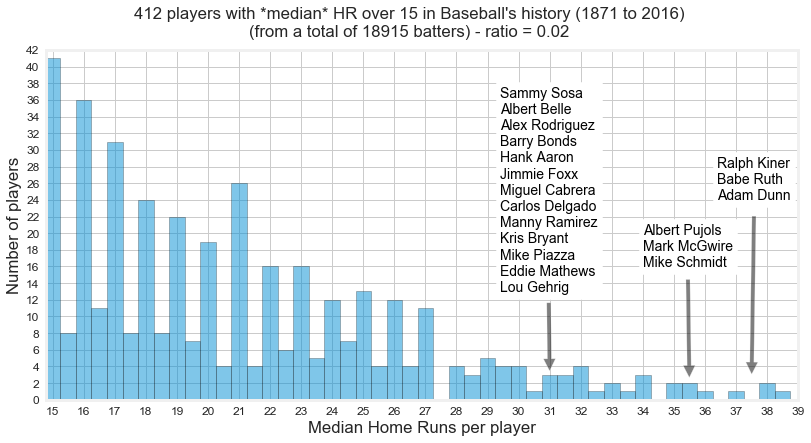

In [2578]:
# Plotting HR median over 15
fig = plt.figure(figsize=(12,6), facecolor='w')
fig.suptitle(str(over_15['count'].sum()) 
             +" players with *median* HR over 15 in Baseball's history (1871 to 2016)\n" 
             +'(from a total of '+str(len(all_med)) +' batters) - '
             + 'ratio =' +" %.2f" % over15_ratio)
ax = fig.add_subplot(1,1,1,facecolor='w')

ax.bar(HRmedian_counts['HRmedian'], HRmedian_counts['count'], 0.5, align='center', alpha=0.5, edgecolor='k')

plt.ylim(0, 42)
plt.xlim(14.8,39)
ax.locator_params(nbins=30)

ax.set_xlabel('Median Home Runs per player')
ax.set_ylabel('Number of players')

ax.annotate(str(all_med['nameFirst'].loc[0] +' ' +str(all_med['nameLast'].loc[0]))
               +'\n'
               +(all_med['nameFirst'].loc[1] +' ' +str(all_med['nameLast'].loc[1]))
               +'\n'
               +(all_med['nameFirst'].loc[2] +' ' +str(all_med['nameLast'].loc[2])), 
            xy=(37.5, 2), xytext=(36.4, 24), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

ax.annotate(str(all_med['nameFirst'].loc[3] +' ' +str(all_med['nameLast'].loc[3]))
               +'\n'
               +(all_med['nameFirst'].loc[4] +' ' +str(all_med['nameLast'].loc[4]))
               +'\n'
               +(all_med['nameFirst'].loc[5] +' ' +str(all_med['nameLast'].loc[5])), 
            xy=(35.5, 2), xytext=(34, 16), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

ax.annotate(str(all_med['nameFirst'].loc[6] +' ' +str(all_med['nameLast'].loc[6]))
               +'\n'
               +(all_med['nameFirst'].loc[7] +' ' +str(all_med['nameLast'].loc[7]))
               +'\n'
               +(all_med['nameFirst'].loc[8] +' ' +str(all_med['nameLast'].loc[8]))
               +'\n'
               +(all_med['nameFirst'].loc[9] +' ' +str(all_med['nameLast'].loc[9]))
               +'\n'
               +(all_med['nameFirst'].loc[10] +' ' +str(all_med['nameLast'].loc[10]))
               +'\n'
               +(all_med['nameFirst'].loc[11] +' ' +str(all_med['nameLast'].loc[11]))
               +'\n'
               +(all_med['nameFirst'].loc[12] +' ' +str(all_med['nameLast'].loc[12]))
               +'\n'
               +(all_med['nameFirst'].loc[13] +' ' +str(all_med['nameLast'].loc[13]))
               +'\n'
               +(all_med['nameFirst'].loc[14] +' ' +str(all_med['nameLast'].loc[14]))
               +'\n'
               +(all_med['nameFirst'].loc[15] +' ' +str(all_med['nameLast'].loc[15]))
               +'\n'
               +(all_med['nameFirst'].loc[16] +' ' +str(all_med['nameLast'].loc[16]))
               +'\n'
               +(all_med['nameFirst'].loc[17] +' ' +str(all_med['nameLast'].loc[17]))
               +'\n'
               +(all_med['nameFirst'].loc[18] +' ' +str(all_med['nameLast'].loc[18])), 
            xy=(31, 3), xytext=(29.4, 13), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))



plt.show()

In [2579]:
# Also the mean for all players (by year and player)
all_avg = bat_yp.groupby('playerID', as_index=False)['H', 'HR', '2B', '3B'].mean()
all_avr_sort = all_avg.sort_values(['HR'], ascending=False).round(2)

# Adding the first and final games for each player, name and last name.
all_avg_year = pd.merge(all_avg_sort, debut, on=['playerID'], how='inner')
all_avg = all_avg_year.sort_values(['HR'], ascending=False)
all_avg.columns = ['playerID', 'Havg', 'HRavg','2Bavg','3Bavg','debut', 
                   'finalGame', 'nameFirst', 'nameLast']

all_avg.head(5)

,playerID,Havg,HRavg,2Bavg,3Bavg,debut,finalGame,nameFirst,nameLast
0,kinerra01,153.0,38.5,19.5,4.5,1946-04-16,1955-09-25,Ralph,Kiner
2,dunnad01,126.5,38.0,23.5,0.0,2001-07-20,2014-09-28,Adam,Dunn
1,ruthba01,147.5,38.0,26.0,5.5,1914-07-11,1935-05-30,Babe,Ruth
3,pujolal01,184.0,37.0,38.5,1.0,2001-04-02,2016-09-26,Albert,Pujols
4,mcgwima01,118.0,36.0,19.0,0.0,1986-08-22,2001-10-07,Mark,McGwire


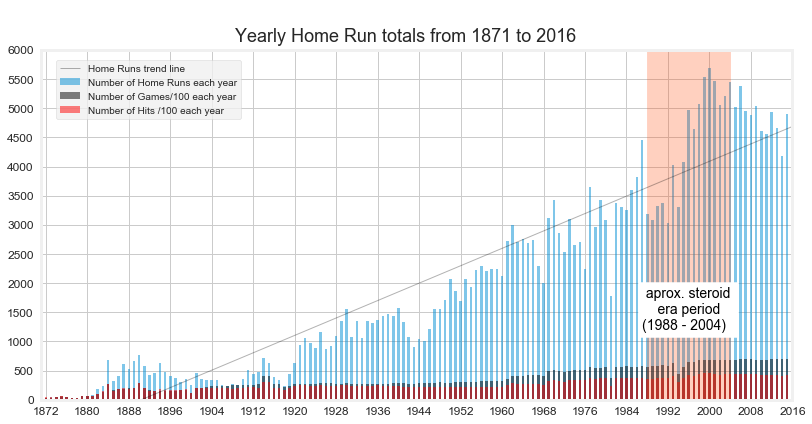

In [2599]:
# Plotting HR yearly totals from 1871 to 2016
majorLocator = MultipleLocator(8)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)

fig = plt.figure(figsize=(12,6), facecolor='w')
fig.suptitle('\n Yearly Home Run totals from 1871 to 2016', size=18)
ax = fig.add_subplot(1,1,1,facecolor='w')

ax.bar(bat_y['yearID'], bat_y['HR'], 0.5, align='center', alpha=0.5, label="Number of Home Runs each year")
ax.bar(bat_y['yearID'], bat_y['G']/100, 0.5, align='center', alpha=0.5, facecolor='k',
       label='Number of Games/100 each year')

ax.bar(bat_y['yearID'], bat_y['H']/100, 0.5, align='center', alpha=0.5, facecolor='red',
       label='Number of Hits /100 each year')

# trend line HR
fit = np.polyfit(bat_y['yearID'], bat_y['HR'], deg=1)
ax.plot(bat_y['yearID'], fit[0] * bat_y['yearID'] + fit[1], color='k', linewidth=1, alpha=.3,
       label="Home Runs trend line")

ax.annotate(' aprox. steroid \n    era period \n(1988 - 2004)', xy=(1988, 1200), xytext=(1987, 1200), 
            color='k', size=14, style='normal', backgroundcolor='w')

ax.locator_params(nbins=22)

# The highlight line for steroid era.
plt.axvspan(1988, 2004, color='#FF4500', alpha=0.25)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
# for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_locator(minorLocator)

plt.ylim(0, 6000)
plt.xlim(1871, 2016)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 


plt.legend(bbox_to_anchor=(0.02, 0.97), loc=2, borderaxespad=0., frameon=True)

plt.show()

In [2498]:
stats.stats.pearsonr(bat_y['yearID'], bat_y['HR'])

(0.94140562054015886, 7.5482882202833304e-70)

In [2582]:
bat_y.head(2)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,NaN,NaN,NaN,NaN,NaN
1,1872,169,3307,15679,3390,4487,567,139,35,2103.0,254.0,118.0,247,252.0,NaN,NaN,NaN,NaN,NaN


In [2789]:
# Looking at average scores from 1984 to 2004. This is the most active PES period.
# A span of 20 or larger is needed for the model.
bat_84_2004_avg =  (bat_y_avg[(bat_y_avg['yearID'] < 2005) & (bat_y_avg['yearID'] > 1983)]).round(2)
bat_84_2004_avg.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
113,1984,1.11,61.11,153.83,19.17,39.98,6.64,1.05,3.48,17.94,3.24,1.62,14.25,24.06,1.36,0.71,1.53,1.38,3.41
114,1985,1.12,60.51,151.72,19.32,39.00,6.81,1.02,3.82,18.16,3.28,1.52,14.67,23.81,1.42,0.74,1.64,1.21,3.49
115,1986,1.14,59.86,150.16,19.46,38.70,6.83,0.90,4.00,18.25,3.48,1.70,14.93,25.92,1.35,0.85,1.59,1.23,3.27
116,1987,1.15,58.77,147.79,20.39,38.87,6.97,0.92,4.57,19.19,3.68,1.57,14.76,25.74,1.32,0.86,1.49,1.14,3.20
117,1988,1.13,57.61,146.52,17.86,37.25,6.56,0.86,3.27,16.67,3.39,1.46,13.34,24.00,1.40,0.94,1.68,1.30,3.17


In [2776]:
bat_84_2004_avg.describe().round(2)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,21.0,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,1994.0,1.16,56.46,139.06,18.69,36.51,6.79,0.82,3.88,17.63,2.87,1.32,13.69,24.63,1.19,1.10,1.46,1.20,3.09
std,6.2,0.05,3.51,9.48,1.22,2.17,0.43,0.09,0.54,1.20,0.47,0.25,0.89,1.66,0.18,0.27,0.14,0.09,0.21
min,1984.0,1.08,44.47,111.27,15.90,30.01,5.77,0.71,3.02,14.99,2.08,0.88,11.23,19.95,0.90,0.71,1.22,1.00,2.46
25%,1989.0,1.13,56.11,136.01,17.62,35.74,6.52,0.76,3.34,16.49,2.54,1.11,13.34,23.81,1.04,0.86,1.33,1.15,3.03
50%,1994.0,1.16,56.91,138.41,18.90,36.79,6.83,0.79,4.00,17.84,2.95,1.39,13.69,25.04,1.19,1.08,1.44,1.21,3.12
75%,1999.0,1.20,57.84,144.56,19.46,37.49,7.15,0.86,4.35,18.25,3.24,1.52,14.25,25.74,1.34,1.31,1.59,1.23,3.17
max,2004.0,1.26,61.11,153.83,20.42,39.98,7.37,1.05,4.63,19.41,3.68,1.70,14.93,26.89,1.46,1.55,1.68,1.38,3.49


In [2777]:
# Max for all players each year (1984 to 2004)
bat_84_2004_max = (bat_y_max[(bat_y_max['yearID'] < 2005) & (bat_y_max['yearID'] > 1983)]).round(2).reset_index()
bat_84_2004_max.head()

,index,yearID,playerID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,113,1984,zuvelpa01,6,162,701,121,213,44,19,43,123.0,75.0,22.0,107,168.0,25.0,23.0,16.0,14.0,36.0
1,114,1985,zuvelpa01,6,163,691,146,240,48,21,40,145.0,110.0,25.0,114,166.0,31.0,24.0,23.0,15.0,35.0
2,115,1986,zuvelpa01,6,163,687,130,238,53,14,40,121.0,107.0,19.0,105,185.0,25.0,35.0,18.0,15.0,28.0
3,116,1987,zuvelpa01,6,162,655,123,218,42,15,49,137.0,109.0,22.0,136,186.0,29.0,28.0,22.0,12.0,25.0
4,117,1988,zuvelpa01,3,162,657,128,234,45,15,42,124.0,93.0,29.0,125,153.0,27.0,16.0,20.0,13.0,24.0


In [2778]:
bat_84_2004_max.describe().round(2).reset_index()

,level_0,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,count,21.0,21.0,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
1,mean,123.0,1994.0,6.29,159.29,663.43,131.43,219.48,50.62,15.33,50.38,138.14,75.05,22.57,141.43,171.52,36.33,23.57,21.62,14.05,27.57
2,std,6.2,6.2,1.79,10.62,47.63,12.66,20.04,4.68,2.99,9.37,14.10,17.08,3.08,31.10,15.92,22.69,6.95,5.97,1.43,3.72
3,min,113.0,1984.0,3.00,116.00,484.00,106.00,165.00,42.00,11.00,40.00,116.00,48.00,17.00,105.00,128.00,20.00,11.00,16.00,12.00,20.00
4,25%,118.0,1989.0,6.00,162.00,655.00,123.00,211.00,46.00,14.00,43.00,125.00,65.00,21.00,125.00,166.00,25.00,18.00,17.00,13.00,25.00
5,50%,123.0,1994.0,6.00,162.00,682.00,133.00,218.00,51.00,14.00,48.00,137.00,74.00,22.00,136.00,172.00,29.00,24.00,20.00,14.00,27.00
6,75%,128.0,1999.0,6.00,163.00,690.00,143.00,234.00,54.00,17.00,52.00,147.00,77.00,24.00,149.00,185.00,34.00,28.00,24.00,15.00,29.00
7,max,133.0,2004.0,10.00,163.00,704.00,152.00,262.00,59.00,21.00,73.00,165.00,110.00,29.00,232.00,195.00,120.00,35.00,39.00,17.00,36.00


In [2779]:
# And just the total from 1988 to 2004. By year.
bat_84_2004 = (bat_y[(bat_y['yearID'] < 2005) & (bat_y['yearID'] > 1983)]).reset_index()
bat_84_2004.head()

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,113,1984,1034,57142,143829,17921,37381,6213,985,3258,16778.0,3032.0,1511.0,13320,22500.0,1270.0,668.0,1435.0,1286.0,3193.0
1,114,1985,1055,57063,143075,18216,36778,6423,965,3602,17129.0,3097.0,1431.0,13838,22451.0,1337.0,699.0,1549.0,1144.0,3295.0
2,115,1986,1082,57048,143106,18545,36880,6511,855,3813,17396.0,3312.0,1620.0,14227,24706.0,1289.0,812.0,1515.0,1175.0,3119.0
3,116,1987,1123,57301,144095,19883,37895,6793,896,4458,18713.0,3585.0,1529.0,14389,25099.0,1287.0,842.0,1455.0,1110.0,3124.0
4,117,1988,1097,56059,142568,17380,36244,6386,840,3180,16219.0,3301.0,1418.0,12984,23355.0,1367.0,918.0,1630.0,1265.0,3087.0


In [2790]:
# Looking at the average for the 50s and 60s. We make it from 1946 to 1966. 21 years as well.
bat_46_66_avg = (bat_y_avg[(bat_y_avg['yearID'] < 1967) & (bat_y_avg['yearID'] > 1945)]).round(2).reset_index()
bat_46_66_avg.head()

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,75,1946,1.15,46.74,133.23,15.72,34.05,5.65,1.24,1.92,14.54,1.40,1.02,13.90,15.32,0.0,0.50,2.56,0.0,2.95
1,76,1947,1.14,53.81,155.21,19.90,40.45,6.56,1.48,2.88,18.58,1.40,1.17,16.94,16.83,0.0,0.58,2.58,0.0,3.56
2,77,1948,1.12,54.94,155.74,20.90,41.02,6.80,1.54,2.87,19.54,1.50,1.02,17.75,16.63,0.0,0.63,2.61,0.0,3.57
3,78,1949,1.16,55.47,158.61,21.48,41.67,6.77,1.43,3.20,20.00,1.37,1.06,18.85,16.83,0.0,0.70,2.65,0.0,4.01
4,79,1950,1.18,55.44,160.04,22.67,42.56,7.01,1.50,3.91,21.26,1.23,0.82,18.78,18.03,0.0,0.82,2.36,0.0,4.20


In [2781]:
# Now for the max during the 50s and 60s
bat_46_66_max = (bat_y_max[(bat_y_max['yearID'] < 1967) & (bat_y_max['yearID'] > 1945)]).round(2).reset_index()
bat_46_66_max.head()

,index,yearID,playerID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,75,1946,zuberbi01,3,156,624,142,228,51,20,44,130.0,34.0,11.0,156,109.0,0.0,7.0,20.0,0.0,22.0
1,76,1947,zuberbi01,6,158,659,137,207,45,16,51,138.0,34.0,16.0,162,110.0,0.0,10.0,28.0,0.0,25.0
2,77,1948,zoldasa01,6,156,648,138,230,46,18,40,155.0,32.0,18.0,131,102.0,0.0,8.0,22.0,0.0,25.0
3,78,1949,zoldasa01,6,157,662,150,207,41,23,54,159.0,37.0,14.0,162,92.0,0.0,9.0,25.0,0.0,31.0
4,79,1950,zoldasa01,6,157,642,131,218,56,14,47,144.0,35.0,9.0,144,114.0,0.0,12.0,19.0,0.0,30.0


In [2782]:
bat_46_66_max.describe().round(2)

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,21.0,21.0,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,85.0,1956.0,6.43,158.38,656.52,128.76,211.43,43.86,15.43,47.48,136.14,45.71,15.95,131.62,124.14,13.33,14.71,21.76,7.24,26.57
std,6.2,6.2,1.63,3.40,17.28,9.30,11.39,5.21,2.96,5.34,10.93,21.39,4.83,18.30,21.31,12.35,4.15,4.56,6.14,2.80
min,75.0,1946.0,3.00,154.00,624.00,105.00,190.00,37.00,11.00,37.00,119.00,25.00,9.00,97.00,92.00,0.00,7.00,15.00,0.00,22.00
25%,80.0,1951.0,6.00,156.00,648.00,124.00,204.00,40.00,13.00,44.00,129.00,34.00,13.00,123.00,107.00,0.00,13.00,19.00,0.00,25.00
50%,85.0,1956.0,6.00,157.00,656.00,129.00,209.00,43.00,14.00,47.00,132.00,37.00,15.00,129.00,120.00,18.00,15.00,20.00,10.00,26.00
75%,90.0,1961.0,6.00,162.00,667.00,132.00,218.00,46.00,17.00,51.00,143.00,53.00,18.00,144.00,141.00,25.00,17.00,25.00,12.00,29.00
max,95.0,1966.0,10.00,165.00,695.00,150.00,230.00,56.00,23.00,61.00,159.00,104.00,31.00,162.00,175.00,33.00,23.00,31.00,19.00,32.00


In [2783]:
# And the totals for 50s and 60s. By year.
bat_46_66 = (bat_y[(bat_y['yearID'] < 1967) & (bat_y['yearID'] > 1945)]).reset_index()
bat_46_66.head()

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,75,1946,731,29588,84333,9953,21555,3579,783,1215,9205.0,884.0,340.0,8800,9696.0,0.0,316.0,1622.0,0.0,1865.0
1,76,1947,622,29274,84436,10827,22003,3568,804,1565,10110.0,760.0,333.0,9217,9157.0,0.0,317.0,1406.0,0.0,1938.0
2,77,1948,606,29780,84411,11327,22234,3686,834,1555,10589.0,812.0,288.0,9623,9016.0,0.0,342.0,1416.0,0.0,1934.0
3,78,1949,618,29511,84380,11425,22168,3602,761,1704,10642.0,730.0,299.0,10027,8951.0,0.0,375.0,1408.0,0.0,2132.0
4,79,1950,626,29385,84823,12013,22559,3714,793,2073,11269.0,650.0,231.0,9955,9554.0,0.0,436.0,1249.0,0.0,2226.0


In [2784]:
# Now looking after 2008.
# Testing was enforced starting in 2004 but if we look that early we get players like Alex Rodriguez who
# also used steroids. Players who started in the early 90s were exposed to the period of no testing.
# We want to be safe so we create a Filter after 2008.
# Our sample is only 9 years.

bat_post2008_avg =  (bat_y_avg[bat_y_avg['yearID'] > 2007]).round(2).reset_index()
bat_post2008_avg.head(5)

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,137,2008,1.15,53.88,129.14,17.49,34.06,6.98,0.69,3.78,16.69,2.17,0.80,12.65,25.47,1.01,1.30,1.18,1.06,3.01
1,138,2009,1.20,54.53,131.00,17.71,34.38,6.90,0.75,3.98,16.88,2.35,0.89,13.13,26.53,0.93,1.26,1.29,1.08,3.00
2,139,2010,1.17,55.18,132.39,17.06,34.07,6.79,0.69,3.69,16.24,2.37,0.90,12.63,27.47,0.97,1.24,1.24,1.04,2.98
3,140,2011,1.15,53.07,127.96,16.07,32.64,6.49,0.69,3.52,15.29,2.53,0.97,11.60,26.63,0.95,1.20,1.29,0.98,2.72
4,141,2012,1.20,54.14,128.70,16.37,32.76,6.43,0.72,3.84,15.57,2.51,0.88,11.46,28.37,0.82,1.16,1.15,0.95,2.81


In [2785]:
# And finally the max after 2008

bat_post2008_max =  (bat_y_max[bat_y_max['yearID'] > 2007]).round(2).reset_index()
bat_post2008_max.head(5)

,index,yearID,playerID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,137,2008,zumayjo01,6,163,688,125,213,54,19,48,146.0,68.0,16.0,122,204.0,34.0,27.0,19.0,11.0,32.0
1,138,2009,zumayjo01,6,162,682,124,225,56,13,47,141.0,70.0,17.0,119,223.0,44.0,24.0,20.0,11.0,29.0
2,139,2010,zumayjo01,6,162,680,115,214,49,14,54,126.0,68.0,18.0,114,211.0,38.0,25.0,18.0,12.0,32.0
3,140,2011,zobribe01,6,162,677,136,213,48,16,43,126.0,61.0,17.0,132,205.0,32.0,23.0,19.0,12.0,29.0
4,141,2012,zobribe01,6,162,683,129,216,51,15,44,139.0,49.0,13.0,105,222.0,18.0,17.0,17.0,12.0,28.0


In [2786]:
bat_post2008_max.describe().round(2)

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.0,9.00,9.00,9.00,9.00,9.00,9.00,9.0,9.00,9.00,9.00,9.00
mean,141.00,2012.00,6.89,162.11,674.56,123.89,214.00,51.00,14.0,47.00,132.78,61.33,17.44,122.11,210.44,30.0,24.78,16.56,11.89,29.56
std,2.74,2.74,1.76,0.33,15.13,6.53,8.35,3.74,2.6,4.47,9.28,7.26,2.88,12.19,10.38,8.2,4.47,2.70,1.27,2.07
min,137.00,2008.00,6.00,162.00,638.00,115.00,199.00,45.00,11.0,40.00,116.00,49.00,13.00,105.00,190.00,18.0,17.00,13.00,11.00,26.00
25%,139.00,2010.00,6.00,162.00,672.00,122.00,213.00,48.00,12.0,44.00,126.00,58.00,16.00,114.00,205.00,27.0,23.00,14.00,11.00,28.00
50%,141.00,2012.00,6.00,162.00,680.00,124.00,214.00,51.00,14.0,47.00,133.00,62.00,17.00,119.00,211.00,29.0,25.00,17.00,12.00,29.00
75%,143.00,2014.00,6.00,162.00,683.00,126.00,216.00,54.00,15.0,48.00,139.00,68.00,18.00,132.00,219.00,34.0,27.00,19.00,12.00,31.00
max,145.00,2016.00,10.00,163.00,688.00,136.00,225.00,56.00,19.0,54.00,146.00,70.00,23.00,143.00,223.00,44.0,31.00,20.00,15.00,32.00


In [2787]:
# And the totals for post 2008. By year.
bat_post2008 = (bat_y[bat_y['yearID'] > 2007]).reset_index()
bat_post2008.head(10)

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,137,2008,1481,69565,166714,22585,43972,9014,886,4878,21541.0,2799.0,1035.0,16337,32884.0,1310.0,1672.0,1526.0,1365.0,3883.0
1,138,2009,1514,69038,165849,22419,43524,8737,949,5042,21364.0,2970.0,1133.0,16620,33591.0,1179.0,1590.0,1635.0,1366.0,3796.0
2,139,2010,1464,68921,165353,21308,42554,8486,866,4613,20288.0,2959.0,1128.0,15778,34306.0,1216.0,1549.0,1544.0,1301.0,3719.0
3,140,2011,1485,68729,165705,20808,42267,8399,898,4552,19804.0,3279.0,1261.0,15018,34488.0,1231.0,1554.0,1667.0,1274.0,3523.0
4,141,2012,1539,69519,165251,21017,42063,8261,927,4934,19998.0,3229.0,1136.0,14709,36426.0,1055.0,1494.0,1479.0,1223.0,3614.0
5,142,2013,1522,69268,166070,20255,42093,8222,772,4661,19271.0,2693.0,1007.0,14640,36710.0,1018.0,1536.0,1383.0,1219.0,3732.0
6,143,2014,1558,69564,165614,19761,41595,8137,849,4186,18745.0,2764.0,1035.0,14020,37441.0,985.0,1652.0,1343.0,1277.0,3609.0
7,144,2015,1630,70534,165488,20647,42106,8242,939,4909,19650.0,2505.0,1064.0,14073,37446.0,951.0,1602.0,1200.0,1232.0,3739.0
8,145,2016,1620,70451,165561,21744,42276,8254,873,5610,20745.0,2537.0,1001.0,15088,38982.0,932.0,1651.0,1025.0,1214.0,3719.0


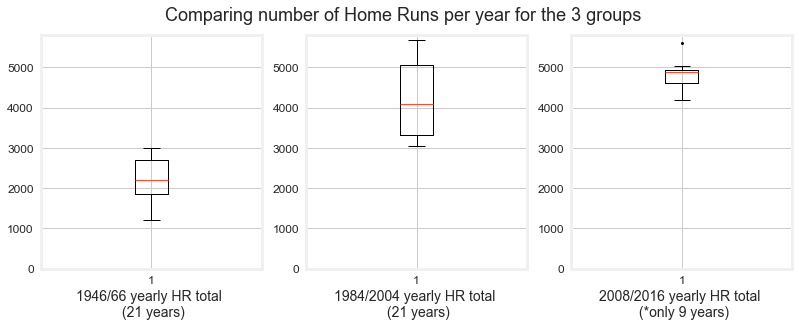

In [2815]:
# Create a boxplot
fig = plt.figure(figsize=(12,4), facecolor='w')
fig.suptitle('Comparing number of Home Runs per year for the 3 groups', size=18)

ax = fig.add_subplot(1,3,1,facecolor='w')
plt.boxplot(bat_46_66['HR'], sym='k.')
plt.ylim(ymin=-1, ymax=5800)
plt.xlabel('1946/66 yearly HR total \n (21 years)', size=14)

ax = fig.add_subplot(1,3,2,facecolor='w')
plt.boxplot(bat_84_2004['HR'], sym='k.')
plt.ylim(ymin=-1, ymax=5800)
plt.xlabel('1984/2004 yearly HR total \n (21 years)', size=14)

ax = fig.add_subplot(1,3,3,facecolor='w')
plt.boxplot(bat_post2008['HR'], sym='k.')
plt.ylim(ymin=-1, ymax=5800)
plt.xlabel('2008/2016 yearly HR total \n (*only 9 years)', size=14)
 
plt.show()

In [2844]:
# One-way ANOVA using Scipy
print("Home Runs:")
print(stats.f_oneway(bat_46_66['HR'], bat_84_2004['HR']))
print("")
print("Hits:")
print(stats.f_oneway(bat_46_66['H'], bat_84_2004['H']))
print("")
print("")
print("test")
print(stats.f_oneway(bat_46_66_max['HR'], bat_84_2004_max['HR']))
print("test")
print(stats.f_oneway(bat_46_66_max['H'], bat_84_2004_max['H']))

Home Runs:
F_onewayResult(statistic=82.754945121356457, pvalue=2.7502350088455824e-11)

Hits:
F_onewayResult(statistic=234.86007822894544, pvalue=2.4522753126449804e-18)


test
F_onewayResult(statistic=1.5234390992835212, pvalue=0.22430228685397841)
test
F_onewayResult(statistic=2.5607208499574128, pvalue=0.11741833243662836)


In [2836]:
# ANOVA
# http://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

k = 2  # number of conditions
n = len(bat_84_2004.values) #Participants in each condition
N = len(bat_84_2004.values)*k # conditions times participants

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1


bat_46_66['group']='sixties'
bat_84_2004['group']='nineties'
samples = bat_46_66.append(bat_84_2004)

# Statsmodels Ordinary Least Squares
mod = ols('HR ~ group',data=samples).fit()           
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

# As can be seen in the ANVOA table Statsmodels don’t provide an effect size.  
# To calculate eta squared we can use the sum of squares from the table.
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
esq_sm

                sum_sq    df          F        PR(>F)
group     4.600309e+07   1.0  82.754945  2.750235e-11
Residual  2.223582e+07  40.0        NaN           NaN


0.67414754688329936

In [2806]:
# Statsmodels Ordinary Least Squares
results = sm.OLS(bat_46_66['HR'], bat_84_2004['HR']).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     HR   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     980.7
Date:                Thu, 22 Jun 2017   Prob (F-statistic):           1.81e-18
Time:                        14:44:04   Log-Likelihood:                -150.55
No. Observations:                  21   AIC:                             303.1
Df Residuals:                      20   BIC:                             304.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HR             0.5042      0.016     31.316      0.0

In [ ]:
# may want to just delete all this


# Counting how many rows for each year.
row_counting = pd.DataFrame(bat_yp2010.yearID.value_counts().reset_index())
# Renaming the columns
row_counting.columns = ['yearID', 'count']
# We want it ordered by year, not by count.
ordered_row_counting = row_counting.sort_values(['yearID'], ascending = True)

# Adding up all the players for a given year.
all_since2010_by_year = bat_yp.groupby('yearID', as_index = False)['H','HR','2B','3B'].sum()

# Merging the count and the all_since2010_by_year table so we can divide by count column to get the average and
# we are sure that the rows match by year. Also we double check the division in count column should be 1.
all_2010_merge_counting = pd.merge(ordered_row_counting, all_since2010_by_year, on=['yearID'], how='inner')

# Convert to Series. This one took me a while! Div (df/df) matches the columns. It only divided count.
cnt2010 = pd.Series(all_2010_merge_counting['count'])

# Now we finally have the averages for all players
average_2010 = all_2010_merge_counting[['H','HR','2B','3B','count']].div(cnt2010, axis='index').round(2)

# Get the year back in.
yer = pd.DataFrame(all_2010_merge_count['yearID'])
all_players2010_avg = yer.join(average)


In [1670]:
# Merging the pes and the master table so we can get the ids of the offending players.
pes_master_df = pd.merge(pes_df, master_df, on=['nameFirst', 'nameLast'], how='inner')

# Sorting by last name.
pes_master_df_ordered = pes_master_df.sort_values('nameLast')

# These players are name duplicates but not listed as offenders in the Mitchell report.
# We create a list to use as a filter and remove them from pes_master_df.
not_offenders = ['bellmi01','brownke04', 'brownke03', 'estalbo01', 'hairsje01', 'matthga01',
                      'stantmi02', 'willima03', 'willima06']

# Removing the non-offenders from pes_master_df.
pes_ms_df = pes_master_df_ordered[~pes_master_df_ordered['playerID'].isin(not_offenders)]

# We create a list of playerIDs of the offending players to filter batting_df.
pes_playerID = pes_ms_df['playerID']

# Getting *only* the offending players from batting_df.
pes_batting_df = batting_df[batting_df['playerID'].isin(pes_playerID)]

# Groupping by yearID and playerID.
# Some players switch teams so we need to add up the stats for that player in one year.
pes_bat = pes_batting_df.groupby(['yearID','playerID'], as_index = False).sum()

# Filtering for the years in which Canseco, Caminiti and McGwire were active players.
pes_filter_1985_2001 = (pes_bat['yearID'] > 1984) & (pes_bat['yearID'] < 2002)

# Using the years filter on pes_bat.
pes_b_1985_2001 = pes_bat[pes_filter_1985_2001]


# Getting the top 4 hitters who used PES. Only 4 because there are only 4 players in
# 1985 and we want to compare the same number of players in each year.

# First we sort by year and HR. We want highest HR at the top.
sort_pes_b = pes_b_1985_2001.sort_values(['yearID','HR'], ascending = False)

# Get the top 4 values for each year.
top4_b_years = sort_pes_b.groupby('yearID').head(4).reset_index(drop=True)

# Double checking that we have 4 rows for each year. We do.
count = pd.value_counts(top4_b_year['yearID'].values, sort=False)
count

# Add up all 4 for each year.
top4_b = top4_b_years.groupby('yearID', as_index = False)['H','HR','2B','3B'].sum()

# Find the average for all the stats excluding the year. Div by 4 since we had 4 players.
top4_b_avr = top4_b[['H','HR','2B','3B']].div(4, axis=1)

# Get the year back in.
yr = pd.DataFrame(top4_b['yearID'])
top4_pes_b_avr_85_01 = year.join(top4_b_avr)

# The table we will use for the charts.
top4_pes_b_avr_85_01

,yearID,H,HR,2B,3B
0,1985,22.25,1.50,3.00,0.75
1,1986,93.25,15.00,20.75,2.75
2,1987,157.75,30.75,32.50,4.50
3,1988,151.00,27.00,27.00,2.00
4,1989,94.25,21.75,19.50,2.00
5,1990,145.50,35.50,22.25,1.75
6,1991,139.00,31.25,26.50,2.75
7,1992,140.75,33.75,26.75,2.00
8,1993,167.25,38.25,30.00,3.25
9,1994,112.75,34.50,17.25,1.75


In [1671]:
# We want the top 25 players who had not been linked to PES use.

# Removing the PES users from batting_df. We use the filter we created earlier. 
non_pes_b = batting_df[~batting_df['playerID'].isin(pes_playerID)]

# Grouping the batting table by yearID and playerID.
all_npes_b = non_pes_b.groupby(['yearID','playerID'], as_index = False).sum()

# Filtering for the years in which Canseco, Caminiti and McGwire were active players.
filter_1985_2001 = (all_npes_b['yearID'] > 1984) & (all_npes_b['yearID'] < 2002)
all_b_1985_2001 = all_npes_b[filter_1985_2001]

# Getting the top 25 hitters.
# First we sort by year and HR. We want highest HR at the top.
sort_hr = all_b_1985_2001.sort_values(['yearID','HR'], ascending = False)

# Get the top 25 values for each year.
top25_hr_year = sort_hr.groupby('yearID').head(25).reset_index(drop=True)

# Double checking that we have 25 rows for each year. We do.
count_by_year = pd.value_counts(top25_hr_year['yearID'].values, sort=False)
count_by_year

# Add up all 25 for each year.
top25_hr = top25_hr_year.groupby('yearID', as_index = False)['H','HR','2B','3B'].sum()

# Find the average for all the stats excluding the year. Div by 25.
top25_hr_avr = top25_hr[['H','HR','2B','3B']].div(25, axis=1)

# Get the year back in.
year = pd.DataFrame(top25_hr['yearID'])
top25_hr_avr_85_01 = year.join(top25_hr_avr)
top25_hr_avr_85_01

,yearID,H,HR,2B,3B
0,1985,151.40,31.00,27.96,2.56
1,1986,152.12,30.40,27.44,2.84
2,1987,153.04,34.96,26.52,2.12
3,1988,151.40,26.84,28.56,3.64
4,1989,145.44,28.52,26.32,3.44
5,1990,143.24,28.84,25.40,2.12
6,1991,150.44,29.84,29.32,2.60
7,1992,149.52,27.24,27.16,3.16
8,1993,151.68,33.08,29.52,2.00
9,1994,122.76,26.72,23.72,1.76


In [1672]:
# We also want the stats for All players
# This is our dataframe:
# all_b_1985_2001

# Counting how many rows for each year.
row_counts = pd.DataFrame(all_b_1985_2001.yearID.value_counts().reset_index())
# Renaming the columns
row_counts.columns = ['yearID', 'count']
# We want it ordered by year, not by count.
ordered_row_counts = row_counts.sort_values(['yearID'], ascending = True)

# Adding up all the players for a given year.
all_b_85_01_by_year = all_b_1985_2001.groupby('yearID', as_index = False)['H','HR','2B','3B'].sum()

# Merging the count and the all_b_85_01_by_year table so we can divde by count column to get the average and
# we are sure that the rows match by year. Also we double check the division in count column should be 1.
all_b_merge_count = pd.merge(ordered_row_counts, all_b_85_01_by_year, on=['yearID'], how='inner')

# Convert to Series. This one took me a while! Div (df/df) matches the columns. It only divided count.
cnt = pd.Series(all_b_merge_count['count'])

# Now we finally have the averages for all players
average = all_b_merge_count[['H','HR','2B','3B','count']].div(cnt, axis='index').round(2)

# Get the year back in.
yrs = pd.DataFrame(all_b_merge_count['yearID'])
all_players_avg = yrs.join(average)

all_players_avg

,yearID,H,HR,2B,3B,count
0,1985,39.07,3.83,6.83,1.02,1.0
1,1986,38.57,3.96,6.79,0.89,1.0
2,1987,38.38,4.47,6.85,0.90,1.0
3,1988,36.91,3.17,6.50,0.86,1.0
4,1989,36.39,3.04,6.30,0.87,1.0
5,1990,34.90,3.05,6.20,0.83,1.0
6,1991,34.55,3.14,6.13,0.85,1.0
7,1992,35.24,2.82,6.33,0.83,1.0
8,1993,36.04,3.46,6.51,0.83,1.0
9,1994,29.03,3.13,5.58,0.69,1.0


In [1673]:
# Studying the 3 players at the center of the scandal.
# We need to find their playerID in master_df, for example: mcgwima01.
canseco_m = master_df.loc[master_df['nameLast'] == 'Canseco']
caminiti_m = master_df.loc[master_df['nameLast'] == 'Caminiti']
mcgwire_m = master_df.loc[master_df['nameLast'] == 'McGwire']
mcgwire_m

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
11252,mcgwima01,1963.0,10.0,1.0,USA,CA,Pomona,NaN,NaN,NaN,NaN,NaN,NaN,Mark,McGwire,Mark David,215.0,77.0,R,R,1986-08-22,2001-10-07,mcgwm001,mcgwima01


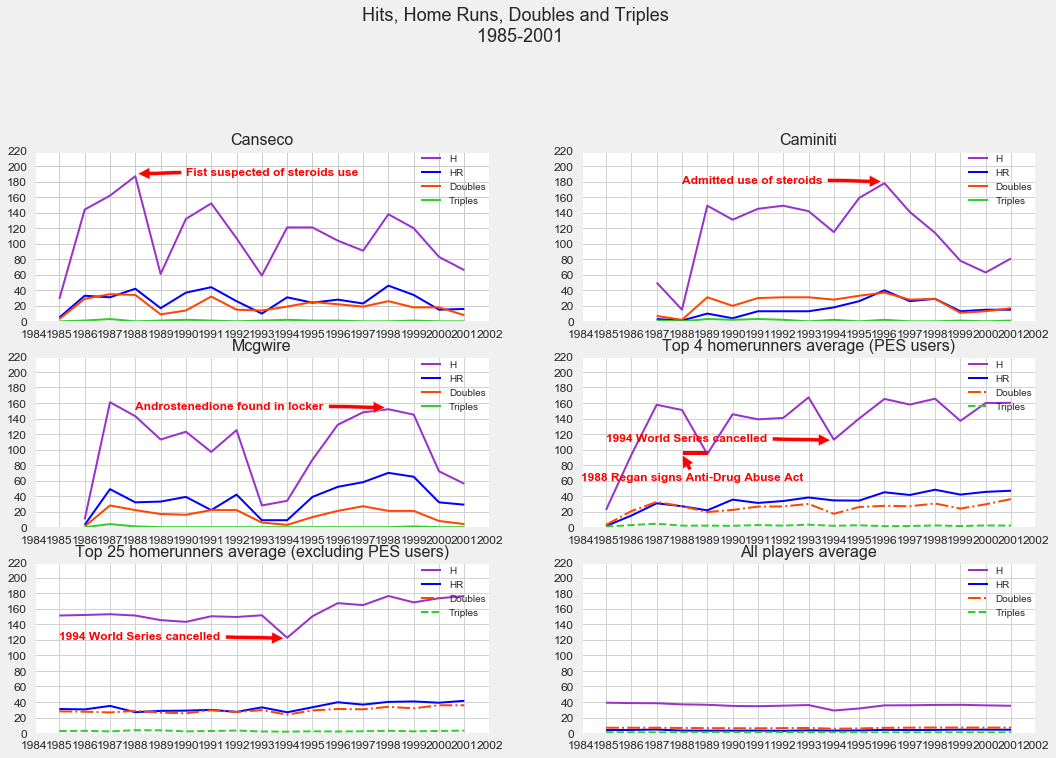

In [2563]:
# Plotting batting statistics for the 3 players, top 4 pes users, top 25 non-pes users and all.
#from mpl_toolkits.axes_grid1 import host_subplot
#import mpl_toolkits.axisartist as AA
#import matplotlib.gridspec as gridspec
from matplotlib import style

style.use('fivethirtyeight')

# Setting the size of the figure a little bigger.
# In order to combine all the plots into one we need a subplot.
fig = plt.figure(figsize=(16,10))
fig.suptitle('Hits, Home Runs, Doubles and Triples \n 1985-2001', fontsize=18, y=1.08)

# Canseco
fig.add_subplot(3,2,1, facecolor='w') # two row, two column, first plot
plt.plot(bat_yp.loc[bat_yp['playerID'] =='cansejo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='cansejo01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='cansejo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='cansejo01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='cansejo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='cansejo01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='cansejo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='cansejo01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Canseco", Size=16)
plt.annotate('Fist suspected of steroids use', xy=(1988, 190), xytext=(1990, 188), color='#FF0000', 
            arrowprops=dict(facecolor='#FF0000', shrink=0.05), size=12, fontweight='bold')
# Change bkgd color
#plt.grid(color='#D3D3D3')
plt.xlim(xmin=1984, xmax=2002)
plt.ylim(ymin=-1, ymax=220)
#increase number of ticks in x and y.
plt.locator_params(nbins=20)
# Place a legend to the right of the subplot.
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# Caminiti
fig.add_subplot(3,2,2, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='caminke01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='caminke01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='caminke01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='caminke01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='caminke01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='caminke01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='caminke01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='caminke01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.title("Caminiti", Size=16)
plt.annotate('Admitted use of steroids', xy=(1996, 180), xytext=(1988, 178), color='#FF0000', 
            arrowprops=dict(facecolor='#FF0000', shrink=0.05), size=12, fontweight='bold')
plt.grid(color='#D3D3D3')
plt.xlim(xmin=1984, xmax=2002)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=20)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# McGwire
fig.add_subplot(3,2,3, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.title("Mcgwire", Size=16)
plt.annotate('Androstenedione found in locker', xy=(1998, 154), xytext=(1988, 152), color='#FF0000', 
            arrowprops=dict(facecolor='#FF0000', shrink=0.05), size=12, fontweight='bold')
plt.grid(color='#D3D3D3')
plt.xlim(xmin=1984, xmax=2002)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=20)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# Top 4 PES
fig.add_subplot(3,2,4, facecolor='w')
plt.plot(top4_pes_b_avr_85_01['yearID'], top4_pes_b_avr_85_01['H'], color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(top4_pes_b_avr_85_01['yearID'], top4_pes_b_avr_85_01['HR'], color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(top4_pes_b_avr_85_01['yearID'], top4_pes_b_avr_85_01['2B'], color='#FF4500', label='Doubles', linewidth=2, ls='-.')
plt.plot(top4_pes_b_avr_85_01['yearID'], top4_pes_b_avr_85_01['3B'], color='#32CD32', label='Triples', linewidth=2, ls='--')
plt.title("Top 4 homerunners average (PES users)", Size=16)
plt.annotate('1994 World Series cancelled', xy=(1994, 112), xytext=(1985, 110), color='#FF0000', 
            arrowprops=dict(facecolor='#FF0000', shrink=0.05), size=12, fontweight='bold')
plt.annotate('1988 Regan signs Anti-Drug Abuse Act', xy=(1988, 94), xytext=(1984, 60), color='#FF0000', 
            arrowprops=dict(facecolor='#FF0000', shrink=0.05), size=12, fontweight='bold')
# draw a hline
plt.axhline(y=95, xmin=0.225, xmax=0.28, color='#FF0000')
plt.grid(color='#D3D3D3')
plt.xlim(xmin=1984, xmax=2002)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=20)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# Top 25
fig.add_subplot(3,2,5, facecolor='w')
plt.plot(top25_hr_avr_85_01['yearID'], top25_hr_avr_85_01['H'], color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(top25_hr_avr_85_01['yearID'], top25_hr_avr_85_01['HR'], color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(top25_hr_avr_85_01['yearID'], top25_hr_avr_85_01['2B'], color='#FF4500', label='Doubles', linewidth=2, ls='-.')
plt.plot(top25_hr_avr_85_01['yearID'], top25_hr_avr_85_01['3B'], color='#32CD32', label='Triples', linewidth=2, ls='--')
plt.title("Top 25 homerunners average (excluding PES users)", Size=16)
plt.annotate('1994 World Series cancelled', xy=(1994, 122), xytext=(1985, 120), color='#FF0000', 
            arrowprops=dict(facecolor='#FF0000', shrink=0.05), size=12, fontweight='bold')
plt.grid(color='#D3D3D3')
plt.xlim(xmin=1984, xmax=2002)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=20)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# All
fig.add_subplot(3,2,6, facecolor='w')
plt.plot(all_players_avg['yearID'], all_players_avg['H'], color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(all_players_avg['yearID'], all_players_avg['HR'], color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(all_players_avg['yearID'], all_players_avg['2B'], color='#FF4500', label='Doubles', linewidth=2, ls='-.')
plt.plot(all_players_avg['yearID'], all_players_avg['3B'], color='#32CD32', label='Triples', linewidth=2, ls='--')
plt.title("All players average", Size=16)
plt.grid(color='#D3D3D3')
plt.xlim(xmin=1984, xmax=2002)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=20)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

plt.show()

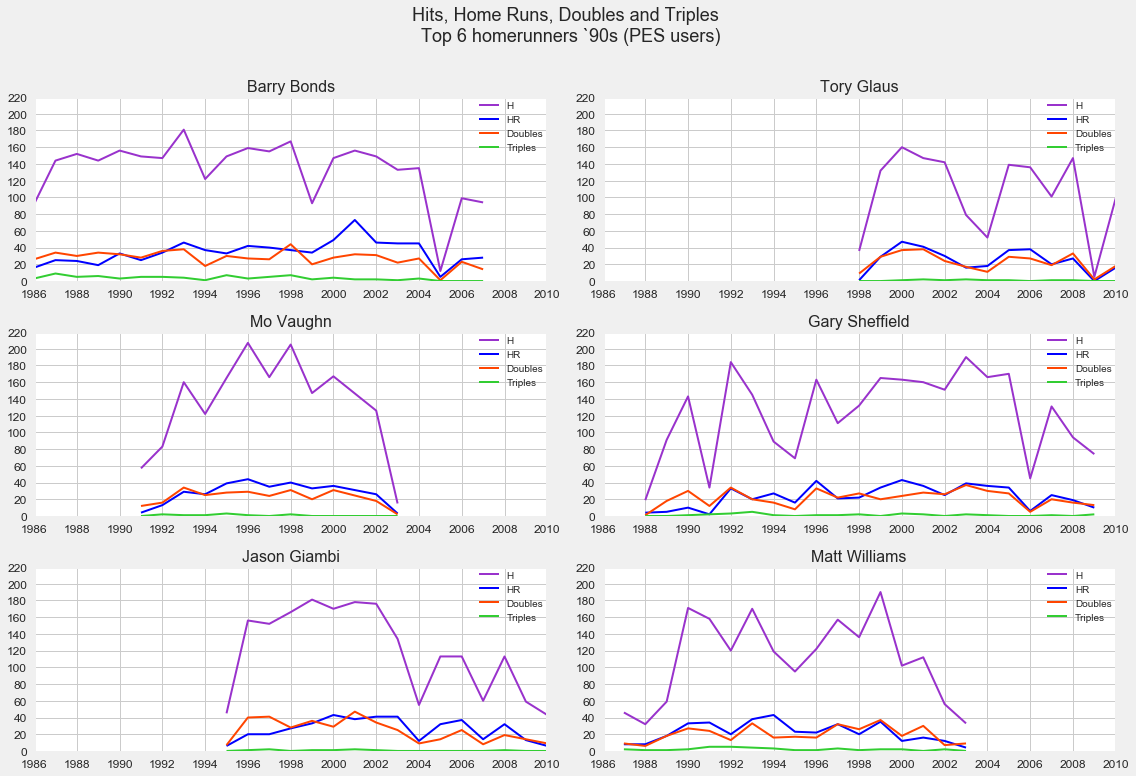

In [2562]:
# Plotting a few more top PES players. Can we see any pattern?
fig = plt.figure(figsize=(16,10))
fig.suptitle('Hits, Home Runs, Doubles and Triples \n Top 6 homerunners `90s (PES users)', fontsize=18, y=1.08)


fig.add_subplot(3,2,1, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='bondsba01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='bondsba01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='bondsba01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='bondsba01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='bondsba01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='bondsba01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='bondsba01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='bondsba01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Barry Bonds", Size=16)

fig.add_subplot(3,2,2, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='glaustr01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='glaustr01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='glaustr01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='glaustr01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='glaustr01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='glaustr01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='glaustr01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='glaustr01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Tory Glaus", Size=16)

fig.add_subplot(3,2,3, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Mo Vaughn", Size=16)

fig.add_subplot(3,2,4, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='sheffga01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='sheffga01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='sheffga01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='sheffga01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='sheffga01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='sheffga01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='sheffga01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='sheffga01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Gary Sheffield", Size=16)

fig.add_subplot(3,2,5, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='giambja01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='giambja01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='giambja01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='giambja01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='giambja01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='giambja01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='giambja01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='giambja01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Jason Giambi", Size=16)

fig.add_subplot(3,2,6, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='willima04']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='willima04']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='willima04']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='willima04']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='willima04']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='willima04']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='willima04']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='willima04']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Matt Williams", Size=16)

fig.tight_layout()
plt.show()

In [1674]:
# With the playerID from master_df we find the players in the batting table.
canseco_b = batting_df.loc[batting_df['playerID'] == 'cansejo01']
caminiti_b = batting_df.loc[batting_df['playerID'] == 'caminke01']
mcgwire_b = batting_df.loc[batting_df['playerID'] == 'mcgwima01']
# Canseco switched teams in 1992 so we need to add up the stats for that year.
# Caminiti switched teams in 2001.
# McGwire switched teams in 1997. We add them as well.
canseco_b_sum = canseco_b.groupby('yearID', as_index = False).sum()
caminiti_b_sum = caminiti_b.groupby('yearID', as_index = False).sum()
mcgwire_b_sum = mcgwire_b.groupby('yearID', as_index = False).sum()

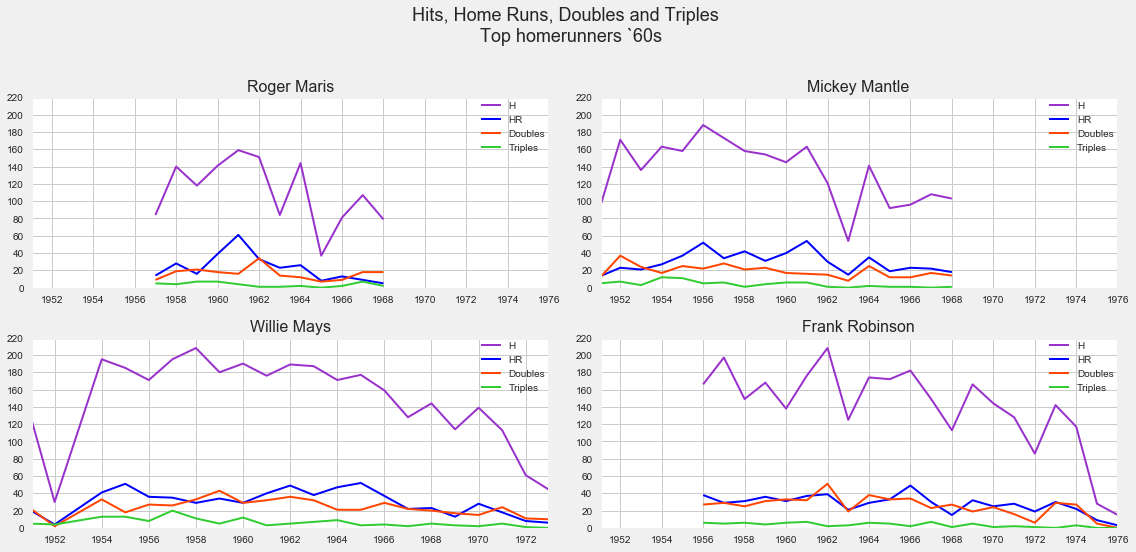

In [1552]:
# Plotting a few more still. This is our cutline. Did Rober Maris use steroids? We don't know.
fig = plt.figure(figsize=(16,10))
fig.suptitle('Hits, Home Runs, Doubles and Triples \n Top homerunners `60s', fontsize=18, y=1.08)

fig.add_subplot(3,2,1, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='marisro01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='marisro01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='marisro01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='marisro01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='marisro01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='marisro01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='marisro01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='marisro01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1951, xmax=1976)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=18)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Roger Maris", Size=16)

fig.add_subplot(3,2,2, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1951, xmax=1976)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=18)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Mickey Mantle", Size=16)

fig.add_subplot(3,2,3, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mayswi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mayswi01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mayswi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mayswi01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mayswi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mayswi01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mayswi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mayswi01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1951, xmax=1973)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=18)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Willie Mays", Size=16)

fig.add_subplot(3,2,4, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='robinfr02']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='robinfr02']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='robinfr02']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='robinfr02']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='robinfr02']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='robinfr02']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='robinfr02']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='robinfr02']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1951, xmax=1976)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=18)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Frank Robinson", Size=16)

fig.tight_layout()
plt.show()

In the above charts we see that all 3 of the key players (Canseco, Caminiti and McGwire) have a few ups and downs in performance over the years. All 3 key players have performance spikes corresponding with suspected or confirmed use of PES. Canseco in 1988, Caminiti in 1996 and McGwire in 1998. In the cases of Canseco and McGwire we see a few ups and downs in Home Runs. For Caminiti, there is a clear trend of increasing performance up to the peak in 1996. He declared that he believed PES was the reason why he performed so well in 1996.

Caminiti declared in 2002 that "at least half" of MLB players were using PES. This makes the analysis very difficult as it is hard to know which players use PES and which ones don't.

I am curious as to wether non PES users have more consistent performance.

In [2012]:
bat_by_player = sorted_batting_df.groupby(['playerID','yearID'], as_index = False).sum()
bat_by_player.head()

# Filtering for the years in which Canseco, Caminiti and McGwire were active players.
a_b_86_01 = bat_by_player[bat_by_player['yearID'] == 1986]
a_b_86_01.head(5)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
47,aasedo01,1986,1,66,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
262,ackerji01,1986,3,44,28,1,3,1,0,0,0.0,0.0,0.0,0,21.0,0.0,0.0,0.0,0.0,0.0
503,adducji01,1986,1,3,11,2,1,1,0,0,0.0,0.0,0.0,1,2.0,0.0,0.0,1.0,0.0,0.0
600,agostju01,1986,3,26,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
614,aguaylu01,1986,1,62,133,17,28,6,1,4,13.0,1.0,1.0,8,26.0,0.0,3.0,0.0,2.0,3.0


In [1679]:
# Calculating the ratio of Homeruns per Hits for the three players
HR_per_H_Canseco = canseco_b_sum['HR'].sum()/canseco_b_sum['H'].sum()
HR_per_H_Caminiti = caminiti_b_sum['HR'].sum()/caminiti_b_sum['H'].sum()
HR_per_H_McGwire = mcgwire_b_sum['HR'].sum()/mcgwire_b_sum['H'].sum()

In [1680]:
# Calculating the ratio of Homeruns per Hits for all players for the 17 year timeframe
HR_per_H_all = (all_b_1985_2001['HR'].sum()/all_b_1985_2001['H'].sum())
# Calculating the mean and std for all players
mean_all_b = all_b_1985_2001['HR'].mean()
std_all_b = all_b_1985_2001['HR'].std()

# Calculating the ratio of Homeruns per Hits for the top 4 PES players.
HR_per_H_4 = (top4_pes_b_avr_85_01['HR'].sum()/top4_pes_b_avr_85_01['H'].sum())
# Calculating the mean and std for the top 4 PES players.
mean_4_b = top4_pes_b_avr_85_01['HR'].mean()
std_4_b = top4_pes_b_avr_85_01['HR'].std()

# Calculating the ratio of Homeruns per Hits for the top 25 players (excludind PES players).
HR_per_H_25 = (top25_hr_avr_85_01['HR'].sum()/top25_hr_avr_85_01['H'].sum())
# Calculating the mean and std for the top 25 players.
mean_25_b = top25_hr_avr_85_01['HR'].mean()
std_25_b = top25_hr_avr_85_01['HR'].std()

# Stats for all since 2010
HR_per_H_all_2010 = (bat_yp['HR'].sum()/bat_yp['H'].sum())
mean_top_2010 = all_players2010_avg['HR'].mean()
std_top_2010 = all_players2010_avg['HR'].std()

In [1681]:
# Taking a look at mean and std for HR of the 3 players compared to the rest
print("Canseco HR mean: " "%.2f" % canseco_b_sum['HR'].mean())
print("Canseco HR std: " "%.2f" % canseco_b_sum['HR'].std())
print ("Canseco HR per H ratio: " "%.2f" % HR_per_H_Canseco)
print('')
print("Caminiti HR mean: " "%.2f" % caminiti_b_sum['HR'].mean())
print("Caminiti HR std: " "%.2f" % caminiti_b_sum['HR'].std())
print ("Canseco HR per H ratio: " "%.2f" % HR_per_H_Caminiti)
print('')
print("McGwire HR mean: " "%.2f" % mcgwire_b_sum['HR'].mean())
print("McGwire HR std: " "%.2f" % mcgwire_b_sum['HR'].std())
print ("Canseco ratio of HR per H: " "%.2f" % HR_per_H_McGwire)
print('')
print('')
print("All players '85 to '01 HR mean: " "%.2f" % mean_all_b)
print("All players HR std: " "%.2f" % std_all_b)
print ("All players HR per H ratio: " "%.2f" % HR_per_H_all)
print('')
print("Top 4 PES players '85 to '01 HR mean: " "%.2f" % mean_4_b)
print("Top 4 PES players HR std: " "%.2f" % std_4_b)
print ("Top 4 PES players HR per H ratio: " "%.2f" % HR_per_H_4)
print('')
print("Top 25 non-PES? players '85 to '01 HR mean: " "%.2f" % mean_25_b)
print("Top 25 non-PES? players HR std: " "%.2f" % std_25_b)
print ("Top 25 non-PES? players HR per H ratio: " "%.2f" % HR_per_H_25)
print('')
print('')
print("All players 2010 HR mean: " "%.2f" % mean_top_2010)
print("All players 2010 HR std: " "%.2f" % std_top_2010)
print ("All players 2010 HR per H ratio: " "%.2f" % HR_per_H_all_2010)

Canseco HR mean: 27.18
Canseco HR std: 11.88
Canseco HR per H ratio: 0.25

Caminiti HR mean: 15.93
Caminiti HR std: 10.56
Canseco HR per H ratio: 0.14

McGwire HR mean: 36.44
McGwire HR std: 19.65
Canseco ratio of HR per H: 0.36


All players '85 to '01 HR mean: 3.69
All players HR std: 7.41
All players HR per H ratio: 0.10

Top 4 PES players '85 to '01 HR mean: 33.69
Top 4 PES players HR std: 12.25
Top 4 PES players HR per H ratio: 0.25

Top 25 non-PES? players '85 to '01 HR mean: 33.42
Top 25 non-PES? players HR std: 5.27
Top 25 non-PES? players HR per H ratio: 0.21


All players 2010 HR mean: 3.52
All players 2010 HR std: 0.56
All players 2010 HR per H ratio: 0.08


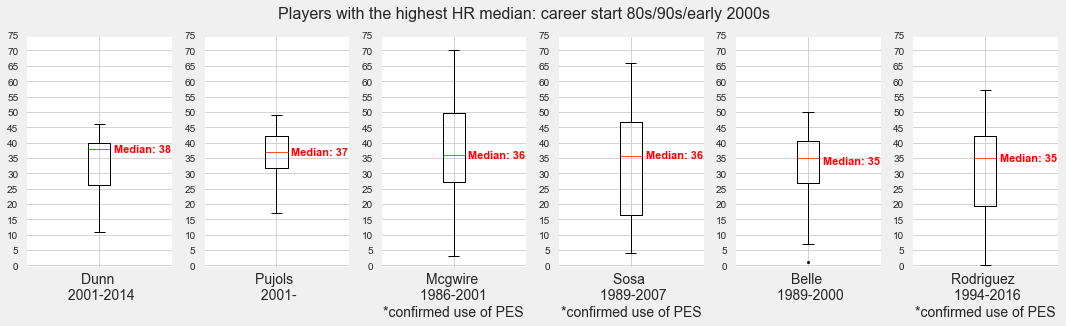

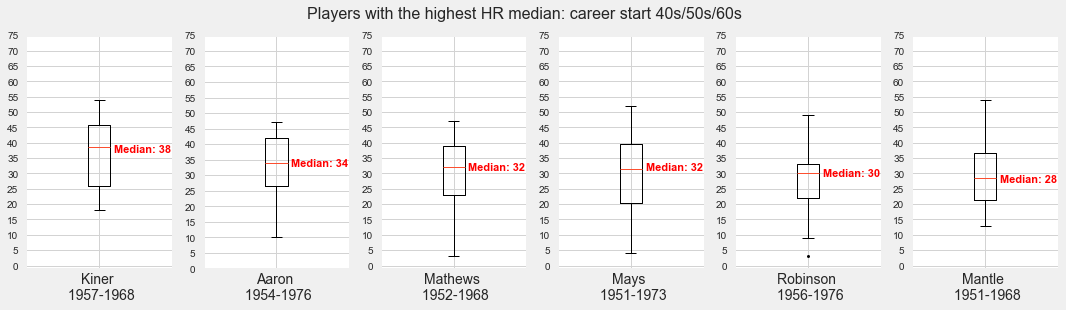

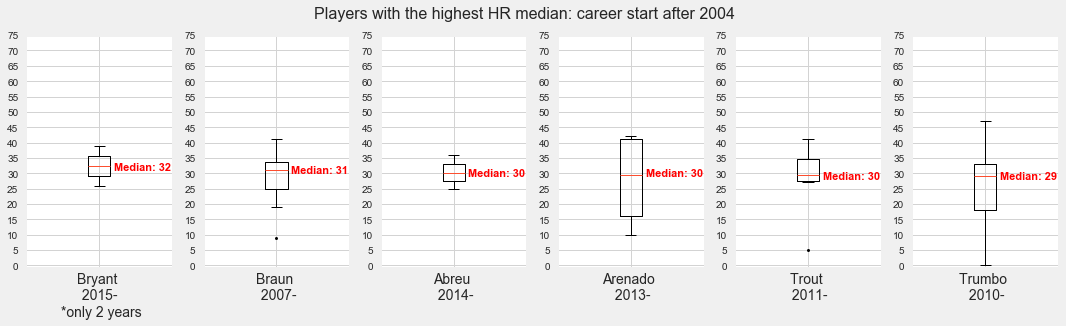

In [2070]:
# Boxplots for several players in the 90s, 60s and 2010s. 
# We want to compare minimum, first quartile, median, third quartile and maximum.
fig = plt.figure(figsize=(16.5,4))
fig.suptitle("Players with the highest HR median: career start 80s/90s/early 2000s", fontsize=16)


# Dunn's boxplot 
fig.add_subplot(1,6,1, facecolor='w') # one row, four column, first plot
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='dunnad01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Dunn \n 2001-2014', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='dunnad01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 37), color='#FF0000', size=11, fontweight='bold')

# Pujols' boxplot 
fig.add_subplot(1,6,2, facecolor='w') # one row, four column, first plot
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='pujolal01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Pujols \n 2001-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='pujolal01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 36), color='#FF0000', size=11, fontweight='bold')

# McGwire's boxplot
fig.add_subplot(1,6,3, facecolor='w')
plt.boxplot(mcgwire_b_sum['HR'], sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Mcgwire \n 1986-2001 \n*confirmed use of PES', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % mcgwire_b_sum['HR'].median(),
             xy=(1, 35.5), xytext=(1.1, 35), color='#FF0000', size=11, fontweight='bold')

# Sosa's boxplot 
fig.add_subplot(1,6,4, facecolor='w') # one row, four column, first plot
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='sosasa01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Sosa \n 1989-2007\n*confirmed use of PES', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='sosasa01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 35), color='#FF0000', size=11, fontweight='bold')

# Belle's boxplot
fig.add_subplot(1,6,5, facecolor='w') # one row, four column, first plot
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='belleal01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Belle \n 1989-2000', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='belleal01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 33), color='#FF0000', size=11, fontweight='bold')

# Rodriguez' boxplot 
fig.add_subplot(1,6,6, facecolor='w')
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='rodrial01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Rodriguez \n 1994-2016\n*confirmed use of PES', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='rodrial01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 34), color='#FF0000', size=11, fontweight='bold')




# And now for the 60s
fig = plt.figure(figsize=(16.5,4))
fig.suptitle("Players with the highest HR median: career start 40s/50s/60s", fontsize=16)

# Kiner's boxplot
fig.add_subplot(1,6,1, facecolor='w') # one row, four column, first plot
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='kinerra01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Kiner \n 1957-1968', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='kinerra01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 37), color='#FF0000', size=11, fontweight='bold')

# Aaron's boxplot 
fig.add_subplot(1,6,2, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='aaronha01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=0, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Aaron \n 1954-1976', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='aaronha01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 33), color='#FF0000', size=11, fontweight='bold')

# Mathews' boxplot 
fig.add_subplot(1,6,3, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='matheed01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Mathews \n 1952-1968', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='matheed01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 31), color='#FF0000', size=11, fontweight='bold')

# Mays' boxplot 
fig.add_subplot(1,6,4, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='mayswi01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Mays \n 1951-1973', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='mayswi01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 31), color='#FF0000', size=11, fontweight='bold')

# Robinson's boxplot 
fig.add_subplot(1,6,5, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='robinfr02']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Robinson \n 1956-1976', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='robinfr02']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 29), color='#FF0000', size=11, fontweight='bold')

# Mantle's boxplot 
fig.add_subplot(1,6,6, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Mantle \n 1951-1968', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 27), color='#FF0000', size=11, fontweight='bold')




# And now for post 2004
fig = plt.figure(figsize=(16.5,4))
fig.suptitle("Players with the highest HR median: career start after 2004", fontsize=16)


# Bryant's boxplot 
fig.add_subplot(1,6,1, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='bryankr01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Bryant \n 2015- \n *only 2 years', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='bryankr01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 31), color='#FF0000', size=11, fontweight='bold')

# Braun's boxplot 
fig.add_subplot(1,6,2, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='braunry02']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Braun \n 2007-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='braunry02']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 30), color='#FF0000', size=11, fontweight='bold')

# Abreu's boxplot 
fig.add_subplot(1,6,3, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='abreujo02']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Abreu \n 2014-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='abreujo02']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 29), color='#FF0000', size=11, fontweight='bold')

# Arenado's boxplot 
fig.add_subplot(1,6,4, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='arenano01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Arenado \n 2013-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='arenano01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 29), color='#FF0000', size=11, fontweight='bold')


# Trout's boxplot 
fig.add_subplot(1,6,5, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='troutmi01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Trout \n 2011-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='troutmi01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 28), color='#FF0000', size=11, fontweight='bold')


# Trumbo's boxplot 
fig.add_subplot(1,6,6, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='trumbma01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Trumbo \n 2010-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='trumbma01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 28), color='#FF0000', size=11, fontweight='bold')

plt.show()

In the boxplots we see that in the 90s and early 2000s (before PES testing was enforced) player's highest HR median was between 35 and 38. McGwire, Sosa and Rodriguez are confirmed PES users. Ref: http://www.complex.com/sports/2012/07/the-25-best-alleged-and-confirmed-steroid-users-in-baseball-history/steroids-7
Comparing that to the top 6 players whose careers started in the 40s/50s and 60s we see that their median HR was 38, 34, 32, 32, 30 and 28.
Move to the post steroid test era, after 2004 we see the 6 players with the highest mean HR with values hovering around 30.

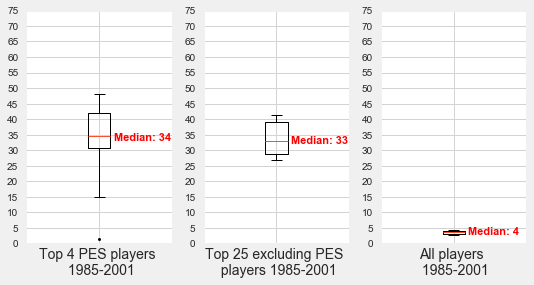

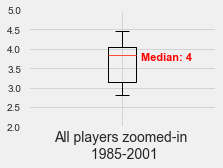

In [1700]:
fig = plt.figure(figsize=(16.5,4))
# Top 4 PES players boxplot
fig.add_subplot(1,6,4, facecolor='w')
plt.boxplot(top4_pes_b_avr_85_01['HR'], sym='k.')
plt.ylim(ymin=0, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Top 4 PES players \n 1985-2001', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % top4_pes_b_avr_85_01['HR'].median(),
             xy=(1, 3), xytext=(1.1, 33), color='#FF0000', size=11, fontweight='bold')

# Top 25 non-pes players boxplot
fig.add_subplot(1,6,5, facecolor='w')
plt.boxplot(top25_hr_avr_85_01['HR'], sym='k.')
plt.ylim(ymin=0, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Top 25 excluding PES \n players 1985-2001', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % top25_hr_avr_85_01['HR'].median(),
             xy=(1, 3), xytext=(1.1, 32), color='#FF0000', size=11, fontweight='bold')

# All players boxplot
fig.add_subplot(1,6,6, facecolor='w')
plt.boxplot(all_players_avg['HR'], sym='k.')
plt.ylim(ymin=0, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('All players \n 1985-2001', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % all_players_avg['HR'].median(),
             xy=(1, 3), xytext=(1.1, 3), color='#FF0000', size=11, fontweight='bold')

plt.show()

# All players boxplot larger

fig2 = plt.figure(figsize=(3,2))

fig.add_subplot(1,1,1, facecolor='w')
plt.boxplot(all_players_avg['HR'], sym='k.')
plt.ylim(ymin=2, ymax=5)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('All players zoomed-in \n 1985-2001', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=10)
plt.annotate("Median: " "%.0f" % all_players_avg['HR'].median(),
             xy=(1, 3), xytext=(1.1, 3.7), color='#FF0000', size=11, fontweight='bold')

plt.show()

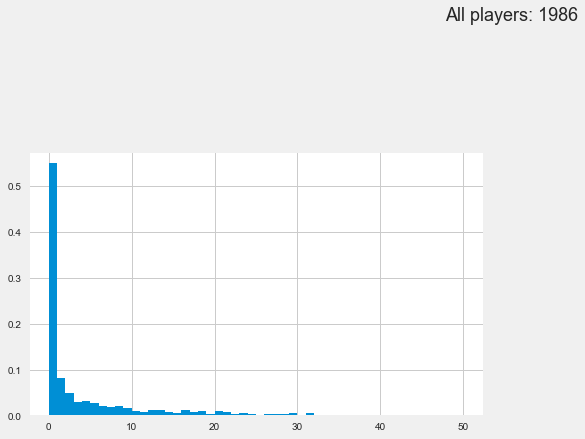

In [1554]:
fig = plt.figure(figsize=(16,10))
fig.suptitle('All players: 1986', fontsize=18, y=1.08)
fig.add_subplot(2,2,1, facecolor='w') # two row, two column, first plot

N = len(a_b_86_01)
ind = np.arange(N)  # the x locations for the groups
width = 2       # the width of the bars

#plt.bar(ind, a_b_86_01['H'], width)
plt.hist(a_b_86_01['HR'], bins=50 , normed=True, range=(0,50))


plt.show()

## References

1. Mitchell, George J., December 13, 2007, Report to the Commissioner of Baseball of an independent investigation into the illegal use of steroids and other Performance Enhancing Substances by players in Major League Baseball. Retrieved from:
http://files.mlb.com/mitchrpt.pdf

2. Erickson, Brandon J, et al., The Effect of the Steroid Era on Major League Baseball Hitters: Did It Enhance Hitting?, Journal of Sports Medicine & Doping Studies, May 31, 2015. Retrived from: https://www.omicsonline.org/open-access/the-effect-of-the-steroid-era-on-major-league-baseball-hitters-did-it-enhance-hitting-2161-0673-1000161.php?aid=53354

3. Historical Timeline, History of Performance, Enhancing Drugs in Sports, procon.org website. Retrieved from:
http://sportsanddrugs.procon.org/view.timeline.php?timelineID=000017

4. Kanayama, Gen et al., “Anabolic-Androgenic Steroid Dependence: An Emerging Disorder.” Addiction (Abingdon, England) 104.12 (2009): 1966–1978. PMC. Web. 21 June 2017.

5. Godfrey, George, baseballssteroidera website. Retrieved from: http://www.baseballssteroidera.com/

6. MLB drug suspensions http://sports.newsday.com/long-island/data/baseball/drug-suspensions/
